# Logistic Regression and SVM Studies

**Autoria:**  
Projeto desenvolvido em dupla por Julia Andreatta e Larissa Zózimo Antunes.

**Contexto:**  
Estudo acadêmico desenvolvido como parte da formação em Ciência da Computação.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Descrição do projeto

Este notebook apresenta a aplicação dos algoritmos de regressão logística e SVM.


## Regressão Logística

1. Utilize a base de dados construída no Trabalho 3 ‘risco_credito.pkl’, que possui 14 registros, para testar o algoritmo de Regressão Logística.

2. Faça o Encoder dos dados e, para facilitar, como fizemos na aula teórica, apague os registros que possuem a classe ‘moderado’. No total teremos 11 registros.

3. Treine o algoritmo de regressão logística e utilize o parâmetro ‘random_state =1’ para ter sempre o mesmo resultado.

4. Utilize o comando ‘.intercept_’ para ter o resultado do B0.
O resultado deve ser =-0.80828993

5. Utilize o comando ‘.coef_’ para ter o resultado dos demais parâmetros que deve ser:
array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

6. Agora utilize o comando ‘predict’ para fazer o teste do seu algoritmo com:

    a) história boa, dívida alta, garantias nenhuma, renda > 35
    (o resultado desse teste deve ser ‘baixo’)

    b) história ruim, dívida alta, garantias adequada, renda < 15
    (o resultado desse teste deve ser ‘alto’)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

#conferindo a qtde de registros
print(len(X_risco_credito))

#já está fazendo o Encoder (trabalho 1)
print(X_risco_credito)
print(y_risco_credito)

14
[[2 0 1 0]
 [1 0 1 1]
 [1 1 1 1]
 [1 1 1 2]
 [1 1 1 2]
 [1 1 0 2]
 [2 1 1 0]
 [2 1 0 2]
 [0 1 1 2]
 [0 0 0 2]
 [0 0 1 0]
 [0 0 1 1]
 [0 0 1 2]
 [2 0 1 1]]
['alto' 'alto' 'moderado' 'alto' 'baixo' 'baixo' 'alto' 'moderado' 'baixo'
 'baixo' 'alto' 'moderado' 'baixo' 'alto']


In [ ]:
#convertendo para array - facilita algumas manipulações
X_risco_credito = np.array(X_risco_credito)
y_risco_credito = np.array(y_risco_credito)

#filtrando apenas os registros diferentes de 'moderado'
indices = y_risco_credito != 'moderado'
X_modificado = X_risco_credito[indices]
y_modificado = y_risco_credito[indices]

#imprimindo o tamanho para conferir
print(len(X_modificado))

#verificando os registros
print(X_modificado)
print(y_modificado)

11
[[2 0 1 0]
 [1 0 1 1]
 [1 1 1 2]
 [1 1 1 2]
 [1 1 0 2]
 [2 1 1 0]
 [0 1 1 2]
 [0 0 0 2]
 [0 0 1 0]
 [0 0 1 2]
 [2 0 1 1]]
['alto' 'alto' 'alto' 'baixo' 'baixo' 'alto' 'baixo' 'baixo' 'alto'
 'baixo' 'alto']


In [ ]:
modelo = LogisticRegression(random_state=1)
modelo.fit(X_modificado, y_modificado)

LogisticRegression(random_state=1)

In [ ]:
print(modelo.intercept_)

[-0.80855152]


In [ ]:
print(modelo.coef_)

[[-0.76706797  0.23921064 -0.47989768  1.12196145]]


In [ ]:
print(modelo.predict([[0, 0, 1, 2]]))
print(modelo.predict([[2, 0, 0, 0]]))

['baixo']
['alto']


##Algoritmo de Regressão Logística para uma base de dados maior (Credit Data)

7. Agora aplique a Regressão Logística na base de dados ‘credit.pkl’. De quanto foi a taxa de acerto?

8. O resultado com a base de dados ‘credit.pkl’ é melhor que os resultados do Naive Bayes e das Florestas Aleatórias? Descreva sua análise de resultados (observe que para isso você deverá visualizar os resultados da Matriz de Confusão, acurácia, precisão e recall).

In [ ]:
# abrir o arquivo
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

#treino com Regressão Logística
modelo = LogisticRegression(random_state=1)
modelo.fit(X_credit_treinamento, y_credit_treinamento)


LogisticRegression(random_state=1)

In [ ]:
#fazendo previsões
previsoes = modelo.predict(X_credit_teste)
print(previsoes)
#dados de teste - respostas reais
print(y_credit_teste)

[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 

In [ ]:
#taxa de acerto
from sklearn.metrics import accuracy_score, classification_report
acuracia = accuracy_score(y_credit_teste, previsoes)
print(acuracia)

0.946


0.946

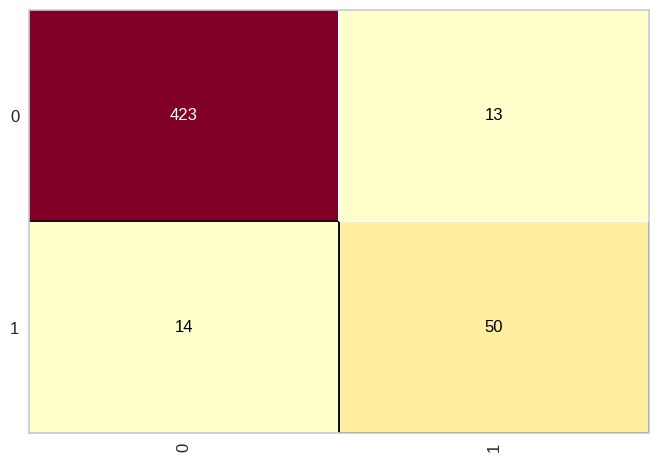

In [ ]:
#linhas=valores reais; colunas=valores previstos
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes)) #rótulos verdadeiros e previsões

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



In [ ]:
#fazendo naive bayes
from sklearn.naive_bayes import GaussianNB

#criar o objeto Nayve Bayes
naiveb_credit = GaussianNB()

naiveb_credit.fit(X_credit_treinamento, y_credit_treinamento)

#fazendo previsões
previsoes = naiveb_credit.predict(X_credit_teste)

#taxa de acerto
acuracia = accuracy_score(y_credit_teste, previsoes)
print(acuracia)

0.938


0.938

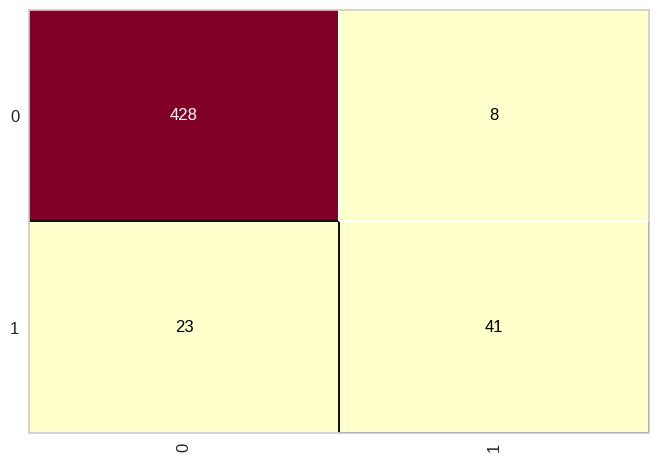

In [ ]:
#linhas=valores reais; colunas=valores previstos
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naiveb_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes)) #rótulos verdadeiros e previsões

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



ACURÁCIAS:

Regressão Logística = 0.946

Naive Bayes = 0.938

Random Forest = 0.984 para 40 árvores (matriz de confusão no outro trabalho)

Com base na análise dos resultados, o modelo Random Forest apresentou o melhor desempenho em comparação com os modelos Regressão Logística e Naive Bayes. A Random Forest obteve acurácia de 0.984, com precisão de 0.95 e recall de 0.92 para a classe 1, demonstrando excelente capacidade de identificar corretamente os casos positivos (inadimplentes). O modelo de Regressão Logística teve desempenho intermediário, com acurácia de 0.946 e recall de 0.78 para a classe 1. Já o Naive Bayes apresentou a menor acurácia (0.938) e o menor recall para a classe 1 (0.64), indicando maior dificuldade em identificar inadimplentes.

Como avaliado no trabalho anterior, o recall da classe 1 é o critério mais crítico, pois classificar um inadimplente como pagante (falso negativo) pode gerar prejuízos financeiros diretos ao banco. Em contrapartida, recusar um bom cliente (falso positivo) afeta o relacionamento, mas não representa uma perda financeira imediata. Por isso, é essencial minimizar os falsos negativos, priorizando o modelo com maior taxa de recall para a classe 1.

Diante disso, considerando a alta acurácia, o excelente equilíbrio entre precisão e recall e, principalmente, o alto recall para a classe 1, o modelo Random Forest foi o que apresentou o melhor desempenho para essa base de dados e deve ser priorizado.


## SVM

1. Aplique o algoritmo SVM na base de dados ‘credit.pkl’.
2. Inicialmente treine o SVM com kernel linear, valor do parâmetro C = 1.0 e ‘random_state =1’
3. Utilize o comando do sklearn accuray_score para calcular a acurácia do seu algoritmo. O resultado deve ser 0.946
4. Teste os demais kernels e anote os resultados. Qual o melhor kernel para a sua base de dados?
    * Polinomial
    * Sigmoide
    * rbf
5. Aumente o valor do parâmetro C aplicado ao melhor kernel e verifique se há mudanças no resultado do seu SVM.
6. O Grid Search (pesquisa em grade) é uma técnica utilizada para melhorar a precisão e a generalização dos modelos de aprendizado de máquina. Ela é usada para realizar ajustes de hiperparâmetros durante o treinamento de um modelo. O grid search automatiza o processo de encontrar hiperparâmetros ideais, economizando esforço humano em comparação com o ajuste manual, mas pode até ser mais custoso do ponto de vista de desempenho, pois testa todas as combinações possíveis e retorna a que obteve melhor desempenho.
Agora, aplique o GridSearch do Scikit-Learn (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para ajudar a identificar os melhores hiperparâmetros para o seu modelo. Qual foi a melhor combinação de hiperparâmetros encontrada? O modelo com melhor desempenho foi obtido com os parâmetros ajustados manualmente ou com o GridSearch?

In [ ]:
from sklearn.svm import SVC

## Base de Dados Credit Data

In [ ]:
#criar e treinar o modelo SVM com kernel linear
modelo_svm = SVC(kernel='linear', C=1.0, random_state=1)
modelo_svm.fit(X_credit_treinamento, y_credit_treinamento)

#fazer previsões
previsoes = modelo_svm.predict(X_credit_teste)
#calcular acurácia
acuracia = accuracy_score(y_credit_teste, previsoes)

print(acuracia)

0.946


In [ ]:
modelo_svm_2 = SVC(kernel='poly', C=1.0, random_state=1)
modelo_svm_2.fit(X_credit_treinamento, y_credit_treinamento)

#fazer previsões
previsoes = modelo_svm_2.predict(X_credit_teste)
#calcular acurácia
acuracia = accuracy_score(y_credit_teste, previsoes)

print(acuracia)

0.968


In [ ]:
modelo_svm_3 = SVC(kernel='sigmoid', C=1.0, random_state=1)
modelo_svm_3.fit(X_credit_treinamento, y_credit_treinamento)

#fazer previsões
previsoes = modelo_svm_3.predict(X_credit_teste)
#calcular acurácia
acuracia = accuracy_score(y_credit_teste, previsoes)

print(acuracia)

0.838


In [ ]:
modelo_svm_4 = SVC(kernel='rbf', C=1.0, random_state=1)
modelo_svm_4.fit(X_credit_treinamento, y_credit_treinamento)

#fazer previsões
previsoes = modelo_svm_4.predict(X_credit_teste)
#calcular acurácia
acuracia = accuracy_score(y_credit_teste, previsoes)

print(acuracia)

0.982


In [ ]:
#questão 5
#TERMINAR - TESTAR MAIS VALORES

modelo_svm_4 = SVC(kernel='rbf', C=7.0, random_state=1)
modelo_svm_4.fit(X_credit_treinamento, y_credit_treinamento)

# Fazer previsões
previsoes = modelo_svm_4.predict(X_credit_teste)
# Calcular acurácia
acuracia = accuracy_score(y_credit_teste, previsoes)

print(acuracia)

0.99


Há mudanças. Para C = 1.0, foi obtida uma acurácia de 0.982. Mudando C para 2.0, acurácia = 0.988. De 3 a 5 os valores também variam mas continuam abaixo de 0.988. Já com C = 7.0, a acurácia chegou em 0.99.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
#definindo os parâmetros a testar
parametros = {
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'C': [0.1, 1, 10]
}

#criando modelo base
svc = SVC(random_state=1)

#criando o GridSearchCV
grid_search = GridSearchCV(svc, parametros, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_credit_treinamento, y_credit_treinamento)

#melhores parâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)

#avaliando no conjunto de teste
melhor_modelo = grid_search.best_estimator_
previsoes = melhor_modelo.predict(X_credit_teste)
acuracia = accuracy_score(y_credit_teste, previsoes)
print("Acurácia no teste:", acuracia)


Melhores hiperparâmetros: {'C': 10, 'kernel': 'rbf'}
Acurácia no teste: 0.988


O melhor desempenho foi obtido ajustando os parâmetros manualmente.

## Análise dos resultados dos 4 algoritmos utilizados em trabalhos anteriores:

6. O resultado do SVM é melhor que os resultados do Naive Bayes, Florestas Aleatórias e Regressão Logística? Descreva sua análise de resultados (observe que para isso você deverá visualizar os resultados da Matriz de Confusão, acurácia, precisão e recall).

0.99

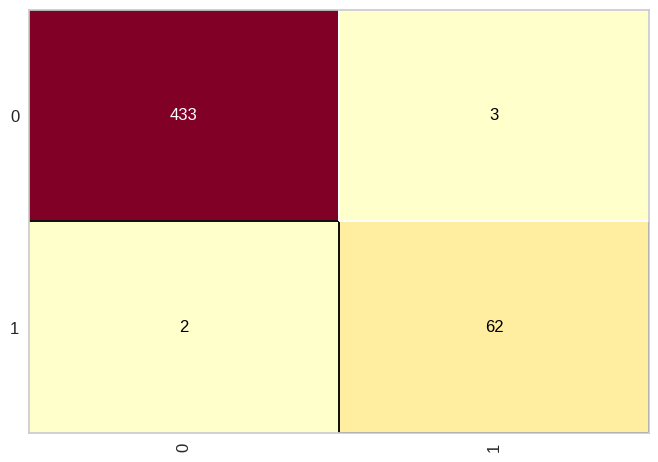

In [ ]:
#linhas=valores reais; colunas=valores previstos
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo_svm_4) #usando a classificação "ajustada"
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes)) #rótulos verdadeiros e previsões

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       436
           1       0.94      0.97      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.98      0.97       500
weighted avg       0.99      0.99      0.99       500



Considerando kernel rbf com C = 7.

Como analisado anteriormente, o recall da classe 1 (inadimplentes) é o critério mais importante. Portanto, o modelo ideal é aquele que minimiza falsos negativos — ou seja, com alto recall para a classe 1.

O SVM ajustado manualmente atingiu um recall de 0.97 para a classe 1, superando todos os demais modelos. Além disso, apresentou a maior acurácia geral (0.99) e manteve um excelente equilíbrio entre precisão e recall. O Random Forest também teve bom desempenho, mas foi um pouco pior com recall 0.92. Regressão Logística e Naive Bayes tiveram desempenho significativamente inferior.

O SVM ajustado foi o modelo com melhor desempenho, pois detecou de forma mais correta os inadimplentes.